In [2]:
# Import packages
import geopandas as gpd
import numpy as np
import pandas as pd
import os
import re
from shapely.geometry import Polygon, MultiPolygon

In [3]:
# Import files related to yields and insurance units
yields = pd.read_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Yield data\Karnataka\yields.xlsx', index_col = 0)
insurance_names = pd.read_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Yield data\Karnataka\insurance_names.xlsx', index_col = 0)
insurance_names['shapeName'] = insurance_names['Insurance Unit'].copy()
#insurance_names.rename(columns={'Insurance Unit': 'shapeName'}, inplace=True)

In [4]:
# Import files related to boundaries
bounds_amd5_simplified = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\geoBoundaries-IND-ADM5-all\geoBoundaries-IND-ADM5_simplified.shp')
bounds_amd5_simplified = bounds_amd5_simplified.sort_values('shapeName')
bounds_info = bounds_amd5_simplified[['shapeName', 'geometry']].copy()
bounds_info['Insurance Unit'] = bounds_info['shapeName'].copy()

In [5]:
# Function which we use to order the words based on lengths (descending) for gp/h names
def sort_length(col_name, df):
    df[col_name] = df[['0', '1', '2', '3', '4']].apply(lambda x: max(x, key=len), axis=1)
    for i in range(len(df)):
        if df.loc[i, '0'] == df.loc[i, col_name]:
            df.loc[i, '0'] = ''
        elif df.loc[i, '1'] == df.loc[i, col_name]:
            df.loc[i, '1'] = ''
        elif df.loc[i, '2'] == df.loc[i, col_name]:
            df.loc[i, '2'] = ''
        elif df.loc[i, '3'] == df.loc[i, col_name]:
            df.loc[i, '3'] = ''
        elif df.loc[i, '4'] == df.loc[i, col_name]:
            df.loc[i, '4'] = ''
    return df

In [6]:
# Function which we use to order the words based on lengths (descending) for bound names
def sort_lengths(col_name, df):
    df[col_name] = df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']].apply(lambda x: max(x, key=len), axis=1)
    for i in range(len(df)):
        if df.loc[i, '0'] == df.loc[i, col_name]:
            df.loc[i, '0'] = ''
        elif df.loc[i, '1'] == df.loc[i, col_name]:
            df.loc[i, '1'] = ''
        elif df.loc[i, '2'] == df.loc[i, col_name]:
            df.loc[i, '2'] = ''
        elif df.loc[i, '3'] == df.loc[i, col_name]:
            df.loc[i, '3'] = ''
        elif df.loc[i, '4'] == df.loc[i, col_name]:
            df.loc[i, '4'] = ''
        elif df.loc[i, '5'] == df.loc[i, col_name]:
            df.loc[i, '5'] = ''
        elif df.loc[i, '6'] == df.loc[i, col_name]:
            df.loc[i, '6'] = ''
        elif df.loc[i, '7'] == df.loc[i, col_name]:
            df.loc[i, '7'] = ''
        elif df.loc[i, '8'] == df.loc[i, col_name]:
            df.loc[i, '8'] = ''
        elif df.loc[i, '9'] == df.loc[i, col_name]:
            df.loc[i, '9'] = ''
        elif df.loc[i, '10'] == df.loc[i, col_name]:
            df.loc[i, '10'] = ''
        elif df.loc[i, '11'] == df.loc[i, col_name]:
            df.loc[i, '11'] = ''
        elif df.loc[i, '12'] == df.loc[i, col_name]:
            df.loc[i, '12'] = ''
        elif df.loc[i, '13'] == df.loc[i, col_name]:
            df.loc[i, '13'] = ''
        elif df.loc[i, '14'] == df.loc[i, col_name]:
            df.loc[i, '14'] = ''
        elif df.loc[i, '15'] == df.loc[i, col_name]:
            df.loc[i, '15'] = ''
        elif df.loc[i, '16'] == df.loc[i, col_name]:
            df.loc[i, '16'] = ''
    return df

In [7]:
# Preprocess the village names such that differences in names diminish
insurance_names.shapeName = insurance_names.shapeName.str.lower()
insurance_names.shapeName.replace(regex={r'aa': 'a', r'bb': 'b', r'cc': 'c', r'dd': 'd', r'ee': 'e', r'ff': 'f', r'gg': 'g', r'hh': 'h', r'ii': 'i', r'jj': 'j', r'kk': 'k', r'll': 'l', r'mm': 'm', r'nn': 'n', r'oo': 'o', r'pp': 'p', r'qq': 'q', r'rr': 'r', r'ss': 's', r'tt': 't', r'uu': 'u', r'vv': 'v', r'ww': 'w', r'xx': 'x', r'yy': 'y', r'zz': 'z'}, inplace=True)
insurance_names.shapeName.replace("\d+", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\-", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\.", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\/", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\,", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("[\(]", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("[\(]", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("[\)]", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("[\[]]", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("[\]]", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\=", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("\@", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("  ", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("  ", " ", regex=True, inplace=True)
insurance_names.shapeName.replace("  ", " ", regex=True, inplace=True)
insurance_names.shapeName = insurance_names.shapeName.str.strip()

In [8]:
# Preprocess the bound names such that differences in names diminish
bounds_info.shapeName = bounds_info.shapeName.str.lower()
bounds_info.shapeName.replace(regex={r'aa': 'a', r'bb': 'b', r'cc': 'c', r'dd': 'd', r'ee': 'e', r'ff': 'f', r'gg': 'g', r'hh': 'h', r'ii': 'i', r'jj': 'j', r'kk': 'k', r'll': 'l', r'mm': 'm', r'nn': 'n', r'oo': 'o', r'pp': 'p', r'qq': 'q', r'rr': 'r', r'ss': 's', r'tt': 't', r'uu': 'u', r'vv': 'v', r'ww': 'w', r'xx': 'x', r'yy': 'y', r'zz': 'z'}, inplace=True)
bounds_info.shapeName.replace("\d+", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\-", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\.", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\/", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\,", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("[\(]", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("[\(]", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("[\)]", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("[\[]]", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("[\]]", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\=", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("\@", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("  ", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("  ", " ", regex=True, inplace=True)
bounds_info.shapeName.replace("  ", " ", regex=True, inplace=True)
bounds_info.shapeName = bounds_info.shapeName.str.strip()

In [9]:
# Split the gp/h names based on white spaces and save in a dataframe
split_names = pd.DataFrame({'shapeName': insurance_names.shapeName})
split_names = split_names.shapeName.str.split(' ', expand=True)
split_names.columns = ['0', '1', '2', '3', '4']
split_names = split_names.fillna("")

In [10]:
# Split the bound names based on white spaces and save in a dataframe
split_bounds = pd.DataFrame({'shapeName': bounds_info.shapeName})
split_bounds = split_bounds.shapeName.str.split(' ', expand=True)
split_bounds.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']
split_bounds = split_bounds.fillna("")

In [11]:
# Sort the words based on lengths (descending) for gp/h names
split_names = sort_length('long1', split_names)
split_names = sort_length('long2', split_names)
split_names = sort_length('long3', split_names)
split_names = sort_length('long4', split_names)
split_names = sort_length('long5', split_names)

In [12]:
# Sort the words based on lengths (descending) for bound names
split_bounds = sort_lengths('long1', split_bounds)
split_bounds = sort_lengths('long2', split_bounds)
split_bounds = sort_lengths('long3', split_bounds)
split_bounds = sort_lengths('long4', split_bounds)
split_bounds = sort_lengths('long5', split_bounds)
split_bounds = sort_lengths('long6', split_bounds)
split_bounds = sort_lengths('long7', split_bounds)
split_bounds = sort_lengths('long8', split_bounds)
split_bounds = sort_lengths('long9', split_bounds)
split_bounds = sort_lengths('long10', split_bounds)
split_bounds = sort_lengths('long11', split_bounds)
split_bounds = sort_lengths('long12', split_bounds)
split_bounds = sort_lengths('long13', split_bounds)
split_bounds = sort_lengths('long14', split_bounds)
split_bounds = sort_lengths('long15', split_bounds)

In [13]:
# Only keep the columns containing the words in descending word length order
split_names = split_names.iloc[:,5:]
split_bounds = split_bounds.iloc[:,17:]

In [14]:
# Next, we create a dataframe containing different possibilities of names for the gp/h
# Column 1: Only the longest word
# Column 2: Longest word and second longest word
# Column 3: Longest word and third longest word
# Column 4: Longest word and (second and third) longest word
# Column 5: Longest word and (second, third and fourth) longst word 

split_names['possible1'] = split_names['long1'] + ' ' + split_names['long2']
split_names['possible2'] = split_names['long1'] + ' ' + split_names['long3']
split_names['possible3'] = split_names['long1'] + ' ' + split_names['long2'] + split_names['long3']
split_names['possible4'] = split_names['long1'] + ' ' + split_names['long2'] + split_names['long3'] + split_names['long4']
df_names_options = split_names[['long1','possible2','possible1', 'possible3','possible4']]

# Put all columns under each other such that we only have one row left
series_names = pd.concat([df_names_options[col] for col in df_names_options.columns], ignore_index=True)
series_names = series_names.str.strip()

# Multiply the original dataframe for gp/h names times 5 such that we can combine it with the newly created names
add_names = insurance_names[['Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk']].copy()
df_names = pd.concat(df_names_options.shape[1] * [add_names], ignore_index=True)
df_names['shapeName'] = series_names

df_names = df_names.drop_duplicates(ignore_index=True) # drop duplicates

In [15]:
# Next, we create a dataframe containing different possibilities of names for the bounds
# Column 1: Only the longest word
# Column 2: Longest word and second longest word
# Column 3: Longest word and third longest word
# Column 4: Longest word and (second and third) longest word
# Column 5: Longest word and (second, third and fourth) longst word 

split_bounds['possible1'] = split_bounds['long1'] + ' ' + split_bounds['long2']
split_bounds['possible2'] = split_bounds['long1'] + ' ' + split_bounds['long3']
split_bounds['possible3'] = split_bounds['long1'] + ' ' + split_bounds['long2'] + split_bounds['long3']
split_bounds['possible4'] = split_bounds['long1'] + ' ' + split_bounds['long2'] + split_bounds['long3'] + split_bounds['long4']
df_bounds_options = split_bounds[['long1','possible2','possible1', 'possible3','possible4']]

# Put all columns under each other such that we only have one row left
series_bounds = pd.concat([df_bounds_options[col] for col in df_bounds_options.columns], ignore_index=True)
series_bounds = series_bounds.str.strip()

# Multiply the original dataframe for gp/h names times 5 such that we can combine it with the newly created names
add_bounds = bounds_info[['Insurance Unit', 'geometry']].copy()
df_bounds = pd.concat(df_bounds_options.shape[1] * [add_bounds], ignore_index=True)
df_bounds['shapeName'] = series_bounds

df_bounds = df_bounds.drop_duplicates(ignore_index=True) # drop duplicates

In [16]:
single_column_units = list(df_names['shapeName']) # Create a list containing all new possible names for the gp/h
single_column_bounds = list(df_bounds['shapeName']) # Create a list containing all new possible names for the bounds
counts = [] # Dummy showing whether we have a match between a possbile name for the gp/h and the bounds

# For each new possible gp/h name, check whether we have a match
# If so, add the index corresponding to the bound name to a new column for each possible gp/h name
df_names['matches'] = np.empty((len(df_names), 0)).tolist() # Create an empty array containing the bound name matches for each gp/h name
for i in range(len(single_column_units)):
    counts.append(single_column_units[i] in single_column_bounds)
    if single_column_units[i] in single_column_bounds:
        df_names.at[i,'matches'] = np.where(np.array(single_column_bounds) == single_column_units[i])[0]
counts.count(True) # Counts the number of matches

# 4865

4865

In [99]:
df_names['selected'] = np.nan # Create an empty column for the final selected index
df_names['geometry'] = np.nan # Create an empty column for geometry
df_names['Insurance Bound'] = np.nan # Create an empty column for the final insurance bound name

# For each of gp/h names, we add the geometry of the corresponding selected bound
for i in range(len(single_column_units)):
    if list(df_names.at[i,'matches']):
        df_names.at[i,'selected'] = df_names.at[i,'matches'][-1]
        df_names.at[i,'geometry'] = df_bounds.loc[df_names.at[i,'selected'], 'geometry']
        df_names.at[i,'Insurance Bound'] = df_bounds.loc[df_names.at[i,'selected'], 'Insurance Unit']

In [100]:
df_names.head()

,Insurance Unit,Gram Panchayat/Hobli,District,Taluk,shapeName,matches,geometry,selected,Insurance Bound
0,114. danapura,gp,ballari,hosapete,danapura,"[157431, 157432]","POLYGON ((76.43156119300005 15.31791931600003,...",157432.0,Danapura
1,34 nekkilady,gp,dakshinakannada,puttur,nekilady,[591],POLYGON ((75.50999352000008 12.710619527000063...,591.0,102 Nekkilady
2,38 kalathur,gp,udupi,udupi,kalathur,"[289468, 289469, 289470, 289471, 289472, 28947...",POLYGON ((78.92455295900004 11.416828571000053...,636048.0,V.Kalathur
3,7th hoskote,gp,kodagu,somawarpet,hoskote,"[250257, 250258]",POLYGON ((75.85038833900006 13.312171460000059...,250258.0,Hoskote
4,80 badagubettu,gp,udupi,udupi,badagubetu,[],NaN,NaN,NaN


In [101]:
df_names.to_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\df_names.xlsx', header=True, index=True)
df_bounds.to_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\df_bounds.xlsx', header=True, index=True)

In [102]:
df_names_wo = df_names[['Insurance Unit', 'Insurance Bound', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'shapeName', 'selected', 'geometry']].copy()
df_names_geometry = gpd.GeoDataFrame(df_names_wo,geometry = df_names.geometry, crs = {'init': 'epsg:4326'}) 
df_names_geometry.to_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\village_shapes.geojson', driver="GeoJSON") 

c:\Users\mieke\anaconda3\envs\thesis_base\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\mieke\anaconda3\envs\thesis_base\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [103]:
# Now, delete the gp/h names without a matched geometry via bound names
df_names_geometry_wo_nan = df_names_geometry.dropna(subset = 'geometry').reset_index()
df_names_geometry_wo_nan.to_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\village_shapes_wo_nan.geojson', driver="GeoJSON") 

c:\Users\mieke\anaconda3\envs\thesis_base\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [109]:
sortes = df_names_geometry_wo_nan[['Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Insurance Bound']].copy()
sortes =sortes.sort_values(['Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Insurance Bound'], ascending=True, ignore_index=True)

In [111]:
df_sorted = df_names_geometry_wo_nan.sort_values(['Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk', 'Insurance Bound'], ascending=True, ignore_index=True)

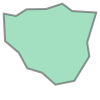

In [113]:
#df_sorted.loc[[43,44]]
df_sorted.loc[43,'geometry']

In [110]:
sortes.head()

,Insurance Unit,Gram Panchayat/Hobli,District,Taluk,Insurance Bound
0,114. danapura,gp,ballari,hosapete,Danapura
1,34 nekkilady,gp,dakshinakannada,puttur,102 Nekkilady
2,38 kalathur,gp,udupi,udupi,V.Kalathur
3,7th hoskote,gp,kodagu,somawarpet,Hoskote
4,a.hosahalli,gp,hasan,hassan,A.Hosahalli


In [114]:
selected_unique = df_names_geometry_wo_nan['selected'].unique()

In [104]:
df_names_geometry_wo_nan.head()

,index,Insurance Unit,Insurance Bound,Gram Panchayat/Hobli,District,Taluk,shapeName,selected,geometry
0,0,114. danapura,Danapura,gp,ballari,hosapete,danapura,157432.0,"POLYGON ((76.43156 15.31792, 76.42645 15.31635..."
1,1,34 nekkilady,102 Nekkilady,gp,dakshinakannada,puttur,nekilady,591.0,"POLYGON ((75.50999 12.71062, 75.50787 12.71487..."
2,2,38 kalathur,V.Kalathur,gp,udupi,udupi,kalathur,636048.0,"POLYGON ((78.92455 11.41683, 78.93393 11.41380..."
3,3,7th hoskote,Hoskote,gp,kodagu,somawarpet,hoskote,250258.0,"POLYGON ((75.85039 13.31217, 75.85896 13.31567..."
4,5,a.hosahalli,Vaddana Hosahalli,gp,hasan,hassan,hosahali,636481.0,"POLYGON ((76.67682 11.76412, 76.66430 11.76335..."


In [94]:
#import_check1 = pd.read_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\df_names_geometry.xlsx', index_col = 0)
#import_check2 = pd.read_excel(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\df_bounds.xlsx', index_col = 0)
import_check1 = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\Datasets\Shapefiles\village_shapes_wo_nan.geojson')

In [97]:
import_check1#.loc[1,'geometry']

,index,Insurance Unit,Gram Panchayat/Hobli,District,Taluk,shapeName,selected,geometry
0,0,114. danapura,gp,ballari,hosapete,danapura,157432.0,"POLYGON ((76.43156 15.31792, 76.42645 15.31635..."
1,1,34 nekkilady,gp,dakshinakannada,puttur,nekilady,591.0,"POLYGON ((75.50999 12.71062, 75.50787 12.71487..."
2,2,38 kalathur,gp,udupi,udupi,kalathur,636048.0,"POLYGON ((78.92455 11.41683, 78.93393 11.41380..."
3,3,7th hoskote,gp,kodagu,somawarpet,hoskote,250258.0,"POLYGON ((75.85039 13.31217, 75.85896 13.31567..."
4,5,a.hosahalli,gp,hasan,hassan,hosahali,636481.0,"POLYGON ((76.67682 11.76412, 76.66430 11.76335..."
...,...,...,...,...,...,...,...,...
4860,7397,nagavi b k,gp,vijayapura,sindagi,nagavi bk,884550.0,"POLYGON ((76.42975 16.93096, 76.43144 16.93351..."
4861,7399,p.g.paalya,gp,chamarajnagar,kollegala,palya pg,886804.0,"POLYGON ((77.27812 11.88647, 77.27767 11.89546..."
4862,7400,pattihal k.b,gp,belagavi,bailhongal,patihal kb,887858.0,"POLYGON ((74.87755 15.69200, 74.87167 15.69293..."
4863,7412,y n hosakote,h,tumakuru,pavagada,hosakote yn,897145.0,"POLYGON ((77.13344 14.28483, 77.15406 14.28304..."


TRASH:

In [21]:
# Next, we create a dataframe containing different possibilities of names for the gp/h
# Column 1: Only the longest word
# Column 2: Longest word and second longest word
# Column 3: Longest word and third longest word
# Column 4: Longest word and (second and third) longest word
# Column 5: Longest word and (second, third and fourth) longst word 

# split_bounds['possible1'] = split_bounds['long1'] + ' ' + split_bounds['long2']
# split_bounds['possible2'] = split_bounds['long1'] + ' ' + split_bounds['long3']
# split_bounds['possible3'] = split_bounds['long1'] + ' ' + split_bounds['long2'] + split_bounds['long3']
# split_bounds['possible4'] = split_bounds['long1'] + ' ' + split_bounds['long2'] + split_bounds['long3'] + split_bounds['long4']
# df_bounds_options = split_bounds[['long1','possible1','possible2', 'possible3','possible4']]

# # Put all columns under each other such that we only have one row left
# series_bounds = pd.concat([df_bounds_options[col] for col in df_bounds_options.columns], ignore_index=True)
# series_bounds = series_bounds.str.strip()
# add_bounds = bounds_info.copy()

# df_bounds = pd.concat([add_bounds, add_bounds, add_bounds, add_bounds, add_bounds], ignore_index=True)
# df_bounds.shapeName = series_bounds
# # official_names = pd.concat([insurance_names['Insurance Unit'], insurance_names['Insurance Unit'], insurance_names['Insurance Unit'], insurance_names['Insurance Unit'], insurance_names['Insurance Unit']])
# # district_names = pd.concat([insurance_names['District'], insurance_names['District'], insurance_names['District'], insurance_names['District'], insurance_names['District']])
# # taluk_names = pd.concat([insurance_names['Taluk'], insurance_names['Taluk'], insurance_names['Taluk'], insurance_names['Taluk'], insurance_names['Insurance Unit']])

# # df_names = pd.DataFrame(list(zip(series_names, official_names)))
# # df_names.columns = ['shapeName', 'Insurance_Unit']
# df_bounds = df_bounds.drop_duplicates()
# # 33755, nu 6549

In [22]:
# single_column_units = list(df_names['shapeName'])
# single_column_bounds = list(df_bounds['shapeName'])
# df_names['numbers'] = pd.Series()
# df_names['numbers'] = df_names['numbers'].astype(object)
# counts = []
# for i in range(len(single_column_units)):
#     counts.append(single_column_units[i] in single_column_bounds)
#     if single_column_units[i] in single_column_bounds:
#         df_names.loc[i,'numbers'] =np.where(np.array(single_column_bounds) == single_column_units[i])[0]
# #counts.count(True)

In [23]:
# df_bounds.loc[[648082,648083],:]

In [24]:
# series_names = pd.concat([df_names_options[col] for col in df_names_options.columns], ignore_index=True)
# add_names = insurance_names[['Insurance Unit', 'Gram Panchayat/Hobli', 'District', 'Taluk']].copy()
# df_names = pd.concat([add_names, add_names, add_names, add_names, add_names], ignore_index=True)
# df_names['shapeName'] = series_names
# df_names['numbers'] = np.empty((len(df_names), 0)).tolist()

# single_column_units = list(df_names['shapeName'])
# single_column_bounds = list(df_bounds['shapeName'])
# counts = []
# for i in range(len(single_column_units)):
#     counts.append(single_column_units[i] in single_column_bounds)
#     if single_column_units[i] in single_column_bounds:
#         df_names.at[i,'numbers'] = np.where(np.array(single_column_bounds) == single_column_units[i])[0]

In [25]:
# single_column_units = list(df_names['shapeName'])
# single_column_bounds = list(df_bounds['shapeName'])
# counts = []
# for i in range(len(single_column_units)):
#     counts.append(single_column_units[i] in single_column_bounds)
#     if single_column_units[i] in single_column_bounds == True:
        
# counts.count(True)
# #3793